In [53]:
import pandas as pd
import numpy as np

In [2]:

# df = pd.read_csv('Video_Games(연평균).csv')
df = pd.read_csv('../RPG_PJT_지혜/data/vgsales.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [3]:
# # 이름, 출시년도 변수 제거
# df=df.drop(['Name','Year'],axis=1)
# # 유저평점 변수 형 변환
# df['U_Score'] = pd.to_numeric(df['U_Score'], errors='coerce')
# df.head()

In [4]:
# df.info()

In [5]:
# # "U_Score" 열의 누락된 값을 최저값으로 채우기
# min_score = df["U_Score"].min()
# df["U_Score"].fillna(min_score, inplace=True)

In [6]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [12]:
# 데이터프레임 복사
df2 = df
df2.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [47]:
# 장르와 NA_Sales만 따로 담기
# ganre_NASales['Genre', 'NA_Sales'] = df2['Genre', 'NA_Sales']
# ganre_NASales.head()
GS = df2[['Genre','NA_Sales', 'Year']]
GS.head(20)

,Genre,NA_Sales,Year
0,Sports,41.49,2006.0
1,Platform,29.08,1985.0
2,Racing,15.85,2008.0
3,Sports,15.75,2009.0
4,Role-Playing,11.27,1996.0
5,Puzzle,23.20,1989.0
6,Platform,11.38,2006.0
7,Misc,14.03,2006.0
8,Platform,14.59,2009.0
9,Shooter,26.93,1984.0


In [54]:
# 연대를 알 수 있는 Feature 만들기
conditions = [GS['Year'] <= 1985,
              (GS['Year'] > 1985) & (GS['Year'] <=1990),
              (GS['Year'] > 1990) & (GS['Year'] <=1995),
              (GS['Year'] > 1995) & (GS['Year'] <=2000), 
              (GS['Year'] > 2000) & (GS['Year'] <= 2005),
              (GS['Year'] > 2005) & (GS['Year'] <= 2010),
              (GS['Year'] > 2010) & (GS['Year'] <= 2015),
              (GS['Year'] > 2015) & (GS['Year'] <= 2020)
]

values = ['1980-1985','1985-1990','1990-1995','1995-2000','2000-2005','2005-2010','2010-2015','2015-2020']

GS['Years'] = np.select(conditions,values)
GS.head(10)

C:\Users\박지혜\AppData\Local\Temp\ipykernel_39616\1980857075.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GS['Years'] = np.select(conditions,values)


,Genre,NA_Sales,Year,Years
0,Sports,41.49,2006.0,2005-2010
1,Platform,29.08,1985.0,1980-1985
2,Racing,15.85,2008.0,2005-2010
3,Sports,15.75,2009.0,2005-2010
4,Role-Playing,11.27,1996.0,1995-2000
5,Puzzle,23.20,1989.0,1985-1990
6,Platform,11.38,2006.0,2005-2010
7,Misc,14.03,2006.0,2005-2010
8,Platform,14.59,2009.0,2005-2010
9,Shooter,26.93,1984.0,1980-1985


In [65]:
GS2 = GS.loc[GS['Genre']=='Action']
GS2.head()

,Genre,NA_Sales,Year,Years
16,Action,7.01,2013.0,2010-2015
17,Action,9.43,2004.0,2000-2005
23,Action,9.63,2013.0,2010-2015
24,Action,8.41,2002.0,2000-2005
38,Action,6.99,2001.0,2000-2005


In [83]:
# df =GS2.drop(['Year'], axis=1)
# df.head()

In [82]:
# df2 = df.groupby(['Years'])
# df2.head(5)

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
# !pip install seaborn

In [99]:
# 연도에 따른 북미 액션게임 출고량을 위한 전처리

df_year_region = GS2.groupby(['Year'])['NA_Sales'].sum()
df_year_region = df_year_region.reset_index()
df_year_region.rename(columns = {'level_1' : 'Region'}, inplace = True)
df_year_region.rename(columns = {0 : 'Sales'}, inplace = True)
df_year_region.head()

,Year,NA_Sales
0,1980.0,0.32
1,1981.0,13.86
2,1982.0,6.07
3,1983.0,2.67
4,1984.0,0.80


c:\Users\박지혜\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\박지혜\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\박지혜\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\박지혜\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is de

Text(0.5, 1.0, '연도에 따른 북미 액션게임 출고량')

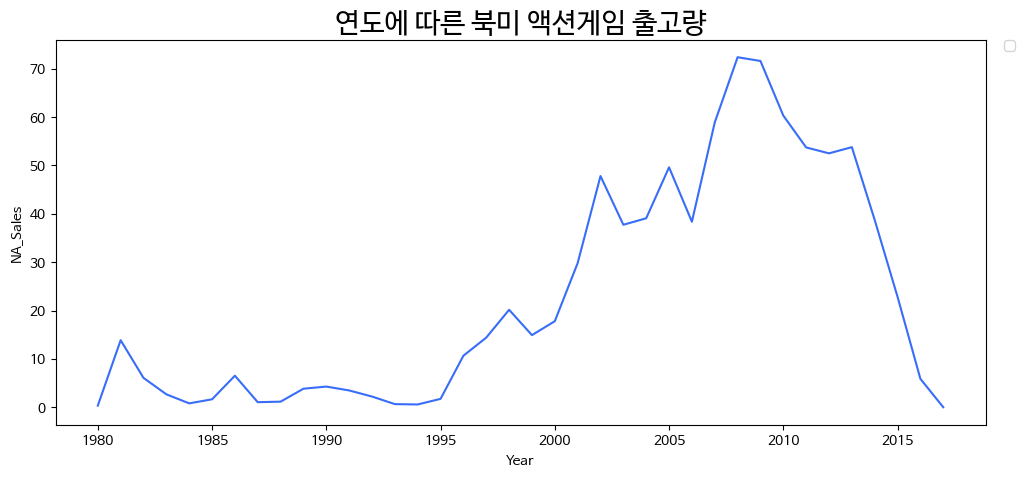

In [102]:
# 연도에 따른 북미 액션게임 출고량 그래프 그리기
plt.figure(figsize=(12, 5))
sns.lineplot(data=df_year_region, x="Year", y="NA_Sales")
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.title('연도에 따른 북미 액션게임 출고량', fontsize=20)

In [111]:
# import matplotlib.pyplot as plt
# !pip install sklearn
import sklearn
# !pip3 install -U scikit-learn

#### 독립변수 종속변수가 각각 한 개일 때의 관계를 분석하는 단순선형회귀분석 진행

In [112]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [117]:
Y = df_year_region['NA_Sales']
Y

0      0.32
1     13.86
2      6.07
3      2.67
4      0.80
5      1.64
6      6.52
7      1.04
8      1.15
9      3.83
10     4.27
11     3.47
12     2.21
13     0.64
14     0.57
15     1.73
16    10.65
17    14.40
18    20.15
19    14.91
20    17.79
21    29.81
22    47.81
23    37.74
24    39.08
25    49.62
26    38.37
27    58.90
28    72.39
29    71.61
30    60.32
31    53.73
32    52.51
33    53.79
34    38.73
35    22.83
36     5.87
37     0.00
Name: NA_Sales, dtype: float64

In [118]:
X = df_year_region['Year']
X

0     1980.0
1     1981.0
2     1982.0
3     1983.0
4     1984.0
5     1985.0
6     1986.0
7     1987.0
8     1988.0
9     1989.0
10    1990.0
11    1991.0
12    1992.0
13    1993.0
14    1994.0
15    1995.0
16    1996.0
17    1997.0
18    1998.0
19    1999.0
20    2000.0
21    2001.0
22    2002.0
23    2003.0
24    2004.0
25    2005.0
26    2006.0
27    2007.0
28    2008.0
29    2009.0
30    2010.0
31    2011.0
32    2012.0
33    2013.0
34    2014.0
35    2015.0
36    2016.0
37    2017.0
Name: Year, dtype: float64

In [120]:
# X, Y 모양 자체를 2d array로 바꿔줘야 함
X = X.values.reshape(-1,1)
Y = Y.values.reshape(-1,1)

In [129]:
import statsmodels.api as sm
# !pip install statsmodels

In [130]:
#fit linear regression model
model = sm.OLS(Y, X).fit()
 
#view model summary
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.496
Model:                            OLS   Adj. R-squared (uncentered):              0.482
Method:                 Least Squares   F-statistic:                              36.35
Date:                Thu, 07 Sep 2023   Prob (F-statistic):                    5.74e-07
Time:                        22:35:27   Log-Likelihood:                         -173.01
No. Observations:                  38   AIC:                                      348.0
Df Residuals:                      37   BIC:                                      349.7
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [133]:
## 모델의 선언
linear_regression = LinearRegression()
 
## 모델-데이터셋의 학습 진행
linear_regression.fit(X, Y)

LinearRegression()

In [134]:
y_val_pred=linear_regression.predict(X)


In [135]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mse_val=mean_squared_error(Y, y_val_pred)
rmse_val=mse_val**0.5
mae_val=mean_absolute_error(Y, y_val_pred)
r2_val=r2_score(Y, y_val_pred)
print('검증데이터 평가')
print('검증데이터 MSE:', mse_val)
print('검증데이터 RMSE:', rmse_val)
print('검증데이터 MAE:', mae_val)
print('검증데이터 r2:', r2_val)

검증데이터 평가
검증데이터 MSE: 292.99180091107456
검증데이터 RMSE: 17.117003269003444
검증데이터 MAE: 12.877282899775954
검증데이터 r2: 0.4485137322515764


### 검증데이터를 학습시킨 후 테스트 데이터로 정확도 확인해보기

In [138]:
linear_regression.fit(X, Y)
y_test_pred=model.predict(X)
mse_test=mean_squared_error(Y, y_test_pred)
rmse_test=mse_test**0.5
mae_test=mean_absolute_error(Y, y_test_pred)
r2_test=r2_score(Y, y_test_pred)
print('테스트데이터 평가')
print('테스트데이터 MSE:', mse_test)
print('테스트데이터 RMSE:', rmse_test)
print('테스트데이터 MAE:', mae_test)
print('테스트데이터 r2:', r2_test)

테스트데이터 평가
테스트데이터 MSE: 527.4432779589258
테스트데이터 RMSE: 22.966133282704032
테스트데이터 MAE: 20.309982647105972
테스트데이터 r2: 0.0072154787060195735


In [12]:
from sklearn.model_selection import train_test_split
# 훈련 세트와 테스트 세트로 데이터 분할
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [13]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(X_train, Y_train)
linear_predictions = linear_model.predict(X_test)

In [14]:
from sklearn.ensemble import RandomForestRegressor
# 랜덤 포레스트 모델 학습 및 예측
rf_model = RandomForestRegressor()
rf_model.fit(X_train, Y_train)
rf_predictions = rf_model.predict(X_test)

In [15]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# 모델평가
linear_mse = mean_squared_error(Y_test, linear_predictions)
linear_mae = mean_absolute_error(Y_test, linear_predictions)
linear_r2 = r2_score(Y_test, linear_predictions)

rf_mse = mean_squared_error(Y_test, rf_predictions)
rf_mae = mean_absolute_error(Y_test, rf_predictions)
rf_r2 = r2_score(Y_test, rf_predictions)

In [16]:
# 평가결과 출력
print("선형 회귀 모델 평가:")
print("MSE:", linear_mse)
print("MAE:", linear_mae)
print("R^2:", linear_r2)
print()

print("랜덤 포레스트 모델 평가:")
print("MSE:", rf_mse)
print("MAE:", rf_mae)
print("R^2:", rf_r2)

선형 회귀 모델 평가:
MSE: 169070598121.64688
MAE: 10533.731937429593
R^2: -25389537179123.94

랜덤 포레스트 모델 평가:
MSE: 4.002656876345563e-05
MAE: 0.0013573293520396364
R^2: 0.993989161527415


- 선형회귀모델 : 
    MSE(평균제곱오차) 예측 결과와 실제 결과 간 매우 큰 오차가 있다
    MAE(평균절대오차) 역시 상당히 큰 값
    R2 음수, 모델이 예측하는 것보다 단순히 평균으로 예측하는 것이 더 나은 수준
    : 적합하지 않다.
- 랜덤포레스트 : 
    MSE값 매우 작고 0에 가깝다.
    MAE값 역시 작다
    R2값 0.99로 매우 매우 높다. 
    : 예측 결과와 실제 결과 간에 작은 오차를 가지고 데이터 잘 설명하는 모델

In [17]:
from sklearn.model_selection import cross_val_score
# 랜덤 포레스트 모델에 대한 k-fold 교차검증 수행
cv_scores = cross_val_score(rf_model, X, Y, cv=5, scoring='neg_mean_squared_error')

In [18]:
import numpy as np
# 교차 검증 결과 출력
cv_mse = -cv_scores
cv_rmse = np.sqrt(cv_mse)
cv_mean_rmse = np.mean(cv_rmse)

print("교차 검증 결과 RMSE:", cv_rmse)
print("평균 RMSE:", cv_mean_rmse)

교차 검증 결과 RMSE: [0.03718663 0.0458009  0.00704321 0.00934419 0.00445218]
평균 RMSE: 0.020765420895218968
